<a href="https://colab.research.google.com/github/chill-br/ajay/blob/main/image_processing_using_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lib used to image process

In [ ]:
# getting an image using web get

!wget'https://tractive.com/blog/wp-content/uploads/2016/04/puppy-care-guide-for-new-parents.jpg'

/bin/bash: line 1: wgethttps://tractive.com/blog/wp-content/uploads/2016/04/puppy-care-guide-for-new-parents.jpg: No such file or directory


In [ ]:
# importing the image module from matplotlib library

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
# loading an image through matplotlib.image module

img = mpimg.imread('/content/cat.jpg')

In [ ]:
type(img)

numpy.ndarray

In [ ]:
print(img.shape)

(1329, 1920, 3)


In [ ]:
print(img)

[[[ 31  23   4]
  [ 32  24   5]
  [ 31  24   6]
  ...
  [146  96  63]
  [146  96  63]
  [147  97  64]]

 [[ 31  23   4]
  [ 31  23   4]
  [ 31  24   6]
  ...
  [145  95  62]
  [146  96  63]
  [146  96  63]]

 [[ 31  23   4]
  [ 31  23   4]
  [ 31  24   6]
  ...
  [145  95  62]
  [145  95  62]
  [145  95  62]]

 ...

 [[ 93  82  76]
  [ 93  82  76]
  [ 93  82  76]
  ...
  [ 42  41  36]
  [ 41  40  35]
  [ 40  39  34]]

 [[ 92  81  75]
  [ 92  81  75]
  [ 92  81  75]
  ...
  [ 43  42  37]
  [ 41  40  35]
  [ 41  40  35]]

 [[ 89  80  73]
  [ 88  79  72]
  [ 87  78  71]
  ...
  [ 44  43  39]
  [ 43  42  38]
  [ 42  41  37]]]


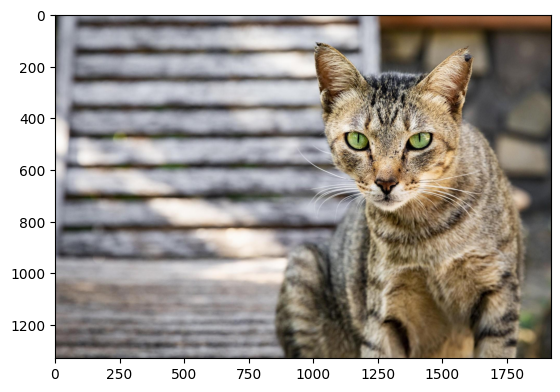

In [ ]:
# displaying the image from numpy array

img_plot = plt.imshow(img)
plt.show()

resizing the image

In [ ]:
from PIL import Image

In [ ]:
img = Image.open('/content/cat.jpg')
img_resized = img.resize((200, 200))

In [ ]:
img_resized.save('cat_image_resized.jpg')

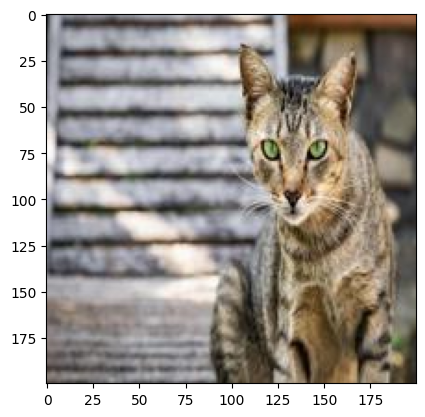

In [ ]:
# displaying the image from numpy array

img_res = mpimg.imread('/content/cat_image_resized.jpg')
img_res_plot = plt.imshow(img_res)
plt.show()

In [ ]:
print(img_res.shape)

(200, 200, 3)


converting rgb into grayscale

In [ ]:
# importing OpenCV library

import cv2

In [ ]:
img = cv2.imread('/content/cat.jpg')

In [ ]:
grayscale_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [ ]:
type(grayscale_image)

numpy.ndarray

In [ ]:
grayscale_image.shape

(1329, 1920)

In [ ]:
from google.colab.patches import cv2_imshow

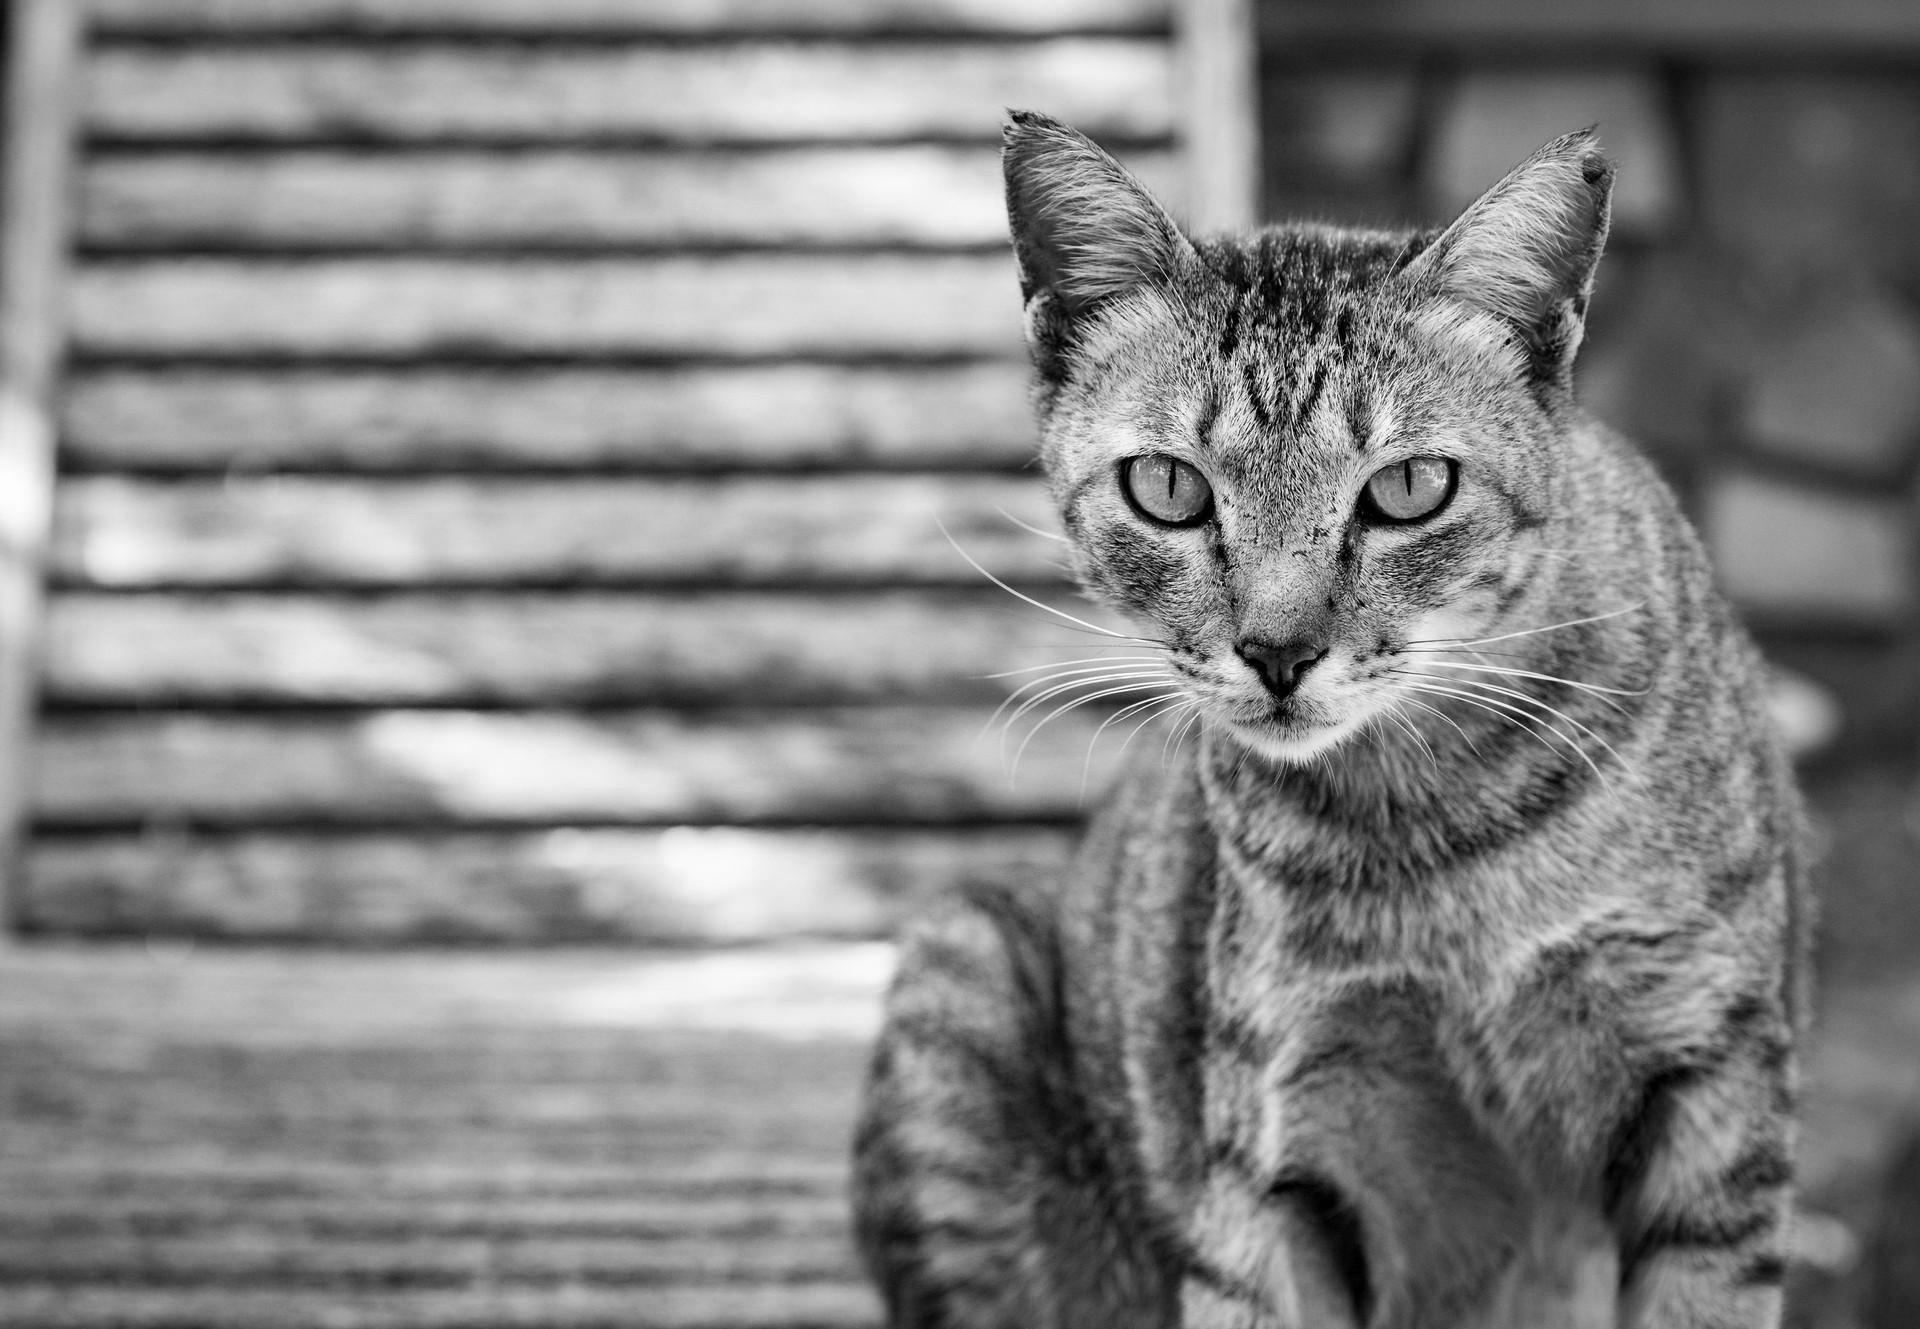

In [ ]:
# displaying the image
cv2_imshow(grayscale_image)

In [ ]:
# saving the grayscale image

cv2.imwrite('cat_grayscale_image.jpg', grayscale_image)

True

**classification of cat and dog**

In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Kaggle api

!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:11<00:00, 118MB/s] 
100% 1.06G/1.06G [00:11<00:00, 103MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 88s 124ms/step - loss: 1.1815 - accuracy: 0.6003 - val_loss: 0.6109 - val_accuracy: 0.6668
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5554 - accuracy: 0.7171 - val_loss: 0.5608 - val_accuracy: 0.7162
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4745 - accuracy: 0.7735 - val_loss: 0.4796 - val_accuracy: 0.7776
Epoch 4/10
625/625 [==============================] - 70s 110ms/step - loss: 0.4154 - accuracy: 0.8112 - val_loss: 0.4450 - val_accuracy: 0.7882
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3577 - accuracy: 0.8446 - val_loss: 0.4513 - val_accuracy: 0.7980
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2818 - accuracy: 0.8786 - val_loss: 0.4644 - val_accuracy: 0.8068
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2002 - accuracy: 0.9189 - val_loss: 0.5692 - val_ac

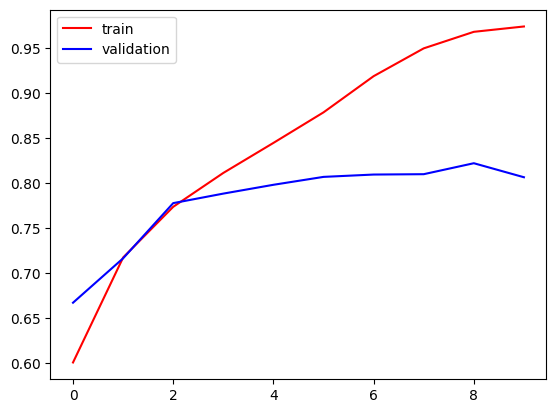

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

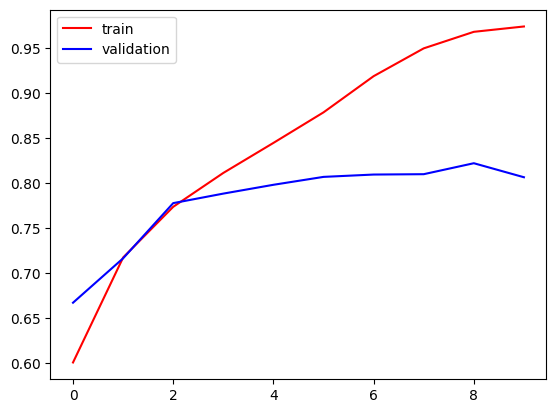

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

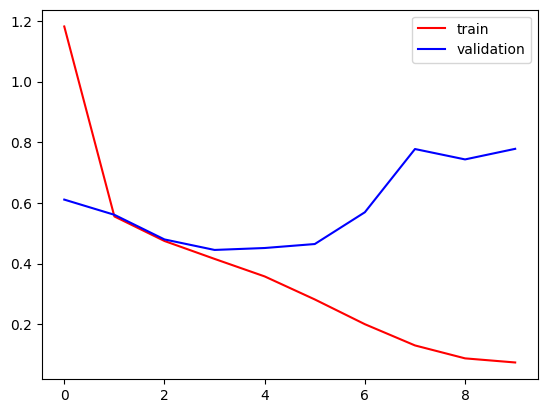

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

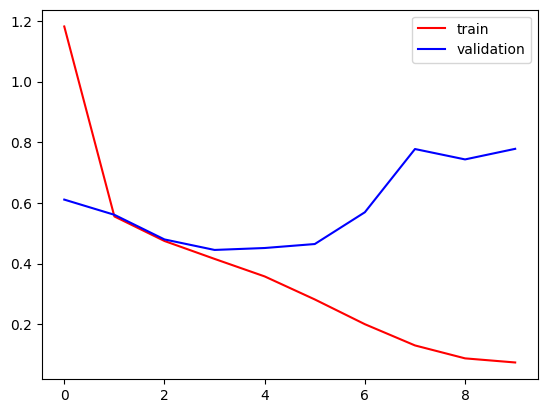

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

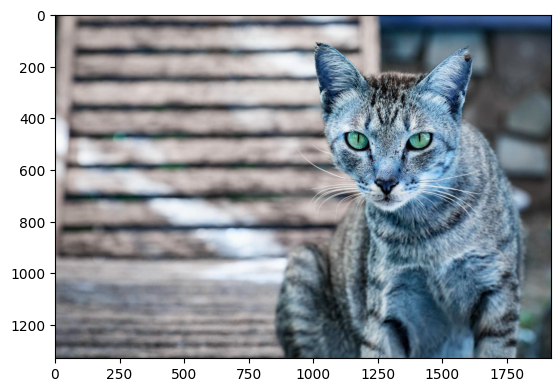

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1329, 1920, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 568ms/step


array([[0.]], dtype=float32)